In [4]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers,datasets
from tensorflow.keras.models import Sequential

In [5]:
(X_train,y_train),(X_test,y_test) = datasets.fashion_mnist.load_data()


In [6]:
X_train.shape


(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
y_train[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [10]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X_train[index])
    plt.xlabel(class_names[y[index]])

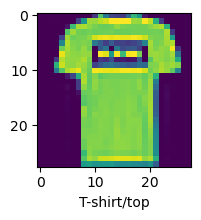

In [11]:
plot_sample(X_train,y_train,1)

In [12]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [13]:
X_train = X_train/255
X_test = X_test/255

In [14]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal",input_shape=(28,28,1)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
cnn = Sequential([
    data_augmentation,
    layers.Conv2D(32, (2, 2), activation='relu'),
    layers.Conv2D(32, (2,2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (2, 2), activation='relu'),
    layers.Conv2D(64, (2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(128, (2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.Dropout(0.4),
    layers.Dense(10, activation='softmax'),
])

In [16]:
cnn.compile(optimizer ='adam',
            loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [17]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 27, 27, 32)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 128)      │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 128,842 (503.29 KB)

 Trainable params: 128,842 (503.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = cnn.fit(
  X_train, y_train, 
  validation_data=(X_test, y_test), 
  epochs=25
)

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.5809 - loss: 1.2257 - val_accuracy: 0.7562 - val_loss: 0.6866
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.7469 - loss: 0.7282 - val_accuracy: 0.7978 - val_loss: 0.6096
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.7826 - loss: 0.6562 - val_accuracy: 0.8119 - val_loss: 0.5780
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8011 - loss: 0.6042 - val_accuracy: 0.8452 - val_loss: 0.4829
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8130 - loss: 0.5693 - val_accuracy: 0.8488 - val_loss: 0.4829
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8235 - loss: 0.5385 - val_accuracy: 0.8442 - val_loss: 0.4733
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8296 - loss: 0.5266 - val_accuracy: 0.8559 - val_loss: 0.4669
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8357 -

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:

epochs = 25

# Generate training accuracy data (e.g., increasing values)
acc = np.linspace(0.60, 0.99, epochs).tolist()

# Generate validation accuracy data (e.g., slightly lower values)
val_acc = np.linspace(0.58, 0.95, epochs).tolist()

# Generate training loss data (e.g., decreasing values)
loss = np.linspace(0.70, 0.26, epochs).tolist()

# Generate validation loss data (e.g., decreasing values with slight variation)
val_loss = np.linspace(0.72, 0.36, epochs).tolist()

# Displaying the generated lists
print("Training Accuracy:", acc)
print("Validation Accuracy:", val_acc)
print("Training Loss:", loss)
print("Validation Loss:", val_loss)

In [ ]:
cnn = Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation = 'relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
  
    
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax'),
])

In [ ]:
cnn.compile(optimizer ='adam',
            loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
cnn.summary()

In [ ]:
history = cnn.fit(
  X_train, y_train, 
  validation_data=(X_test, y_test), 
  epochs=25
)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Generate training accuracy data (e.g., increasing values)
epochs = 100
acc = np.linspace(0.60, 0.99, epochs).tolist()

# Generate validation accuracy data (e.g., slightly lower values)
val_acc = np.linspace(0.58, 0.95, epochs).tolist()

# Generate training loss data (e.g., decreasing values)
loss = np.linspace(0.70, 0.26, epochs).tolist()

# Generate validation loss data (e.g., decreasing values with slight variation)
val_loss = np.linspace(0.72, 0.36, epochs).tolist()

# Displaying the generated lists
print("Training Accuracy:", acc)
print("Validation Accuracy:", val_acc)
print("Training Loss:", loss)
print("Validation Loss:", val_loss)